# Latar Belakang

Pada Dataset Pakistan's Largest E-Commerce Dataset berisikan tentang detail informasi dari setengah juta pemesanan pada *e-commerce* di Pakistan dari Tahun 2016 hingga 2018. Didalamnya terdapat rincian barang (item details), metode pengantaran (shipping method), metode pembayaran (payment method) seperti menggunakan kartu kredit, *easy-paisa* (metode pembayaran sejenis *e-wallet* yang berasal dari Pakistan), *Jazz-Cash*, *Cash-on-Delivery*, kategori produk seperti *fashion*, *handphone/mobile*, barang elektronik, tanggal pemesanan, SKU, harga, jumlah barang, total harga, dan *customer ID*.

## Permasalahan

Seiring berkembangnya *e-commerce* di Pakistan, maka perlua adanya strategi apa yang harus dilakukan untuk meningkatkan penjualan. Melalui kegiatan analisa data yang kemudian disajikan melalui visualisasi data, diharapkan analisis dan rekomendasi yang diberikan dapat meningkatkan penjualan melalui *e-commerce* di Pakistan.

## Dataset

Untuk menjawab permasalahan terkait dengan *e-commerce* di Pakistan, maka dilakukan analisa terhadap dataset terlebih dahulu. Dataset tersebut dapat diakses [disini](https://drive.google.com/drive/folders/1rw5DZIw5_GkJ7yrwHX6oRzvh8iR4lH8V).

Selanjutnya lakukan import beberapa *library* yang dibutuhkan untuk pengerjaan analisa data

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Berikut merupakan 5 (lima) data teratas dan terbawah pada Dataset Pakistan's Largest E-Commerce

In [43]:
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")

display(df.head(), df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan hasil pengamatan yang dilakukan terhadap Dataset yang dimuat, Dataset ini berisikan informasi terkait dengan jenis dan jumlah barang, harga barang, waktu pemesanan, metode pembayaran dan data lainnya yang dapat dijabarkan secara detail sebagai berikut :
* item_id               : Berisikan data/informasi mengenai identitas atau ID pada suatu item
* status                : Berisikan data/informasi mengenai status pesanan
* created_at            : Berisikan data/informasi mengenai tanggal pemesanan barang
* sku                   : Berisikan data/informasi mengenai *Stock Keeping Unit* atau data merk dan type barang
* price                 : Berisikan data/informasi mengenai harga barang satuan
* qty_ordered           : Berisikan data/informasi mengenai jumlah barang yang dipesan
* grand_total           : Berisikan data/informasi mengenai total harga yang harus dibayar setelah diskon
* increment_id          : Berisikan data/informasi mengenai angka unik yang berurutan sebagai primary key tabel
* category_name_1       : Berisikan data/informasi mengenai kategori barang
* sales_commission_code : Berisikan data/informasi mengenai kode komisi penjualan
* discount_amount       : Berisikan data/informasi mengenai harga diskon yang diberikan pada suatu barang
* payment_method        : Berisikan data/informasi mengenai cara/metode pembayaran yang dapat dilakukan
* working date          : Berisikan data/informasi mengenai tanggal kerja
* BI Status             : Berisikan data/informasi mengenai 
* MV                    : Berisikan data/informasi mengenai total harga sebelum diskon
* Year                  : Berisikan data/informasi mengenai tahun transaksi
* Month                 : Berisikan data/informasi mengenai bulan transaksi
* Customer Since        : Berisikan data/informasi mengenai tanggal, bulan dan tahun pengguna menjadi pelanggan
* M-Y                   : Berisikan data/informasi mengenai bulan dan tahun transaksi
* FY                    : Berisikan data/informasi mengenai tahun fiskal 
* Customer ID           : Berisikan data/informasi mengenai identitas customer/pelanggan
* Unnamed               : Kolom *Dummy*

## Data Preparation

Sebelum melakukan analisa data sebagai seorang *data analyst* kita harus mempersiapkan datanya terlebih dahulu dari data mentah, menjadi data yang bisa dan siap diolah. Tahapan pertama dari data preparation adalah *Data Understanding* yaitu memahami terlebih dahulu data apa saja yang terdapat dalam dataset yang akan diolah sehingga kita dapat mengetahui apa saja hubungan ataupun pola data yang ada pada dataset. Kemudian barulah dilakukan tindakan manipulasi data seperti *Data Cleansing* yang bertujuan untuk menghapus atau mengisi data yang kosong/hilang atau tidak terisi. Selanjutnya, dilakukan juga *Data Formatting* untuk mendapatkan data yang benar-benar siap untuk diolah.

Pertama, kita akan melihat informasi secara umum pada Dataset Pakistan's Largest E-Commerce

In [44]:
print('Jumlah baris dalam Dataset ini adalah', df.shape[0])
print('Jumlah kolom dalam Dataset ini adalah', df.shape[1])
df.info()

Jumlah baris dalam Dataset ini adalah 1048575
Jumlah kolom dalam Dataset ini adalah 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  

In [45]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


In [46]:
pd.set_option('display.max_colwidth', -1)
# Menampilkan data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

Secara umum, dari dataset tersebut kita bisa mendapatkan informasi berupa:

* Dataset Pakistan's Largest E-Commerce memiliki 26 kolom dan 1.048.575 baris
* Dalam dataset tersebut, terdapat beberapa kolom yang memiliki *missing value* ditandai dengan adanya data NaN, untuk lebih jelasnya akan dicek pada penanganan *Missing Value*
* Terdapat sedikit kekeliruan penulisan pada kolom `MV` yang terdapat spasi
* Terdapat 2 (dua) kolom yang menggunakan tipe data object sementara kolom tersebut berisikan data numerik. Kolom yang dimaksud adalah `increment ID` dan `MV`
* Terdapat 5 (lima) kolom tidak berisikan data sama sekali sehingga bisa langsung dihapus
* Terdapat nilai #REF! pada kolom `BI Status`

## *Data Cleaning*
Identifikasi dan penanganan data anomali (*Missing Values*, *outlier*, *data formatting*, etc)

### Missing Value

Tampilan jumlah dan persentase *missing value* pada tiap kolom

In [47]:
df.isna().sum()

item_id                  464051 
status                   464066 
created_at               464051 
sku                      464071 
price                    464051 
qty_ordered              464051 
grand_total              464051 
increment_id             464051 
category_name_1          464215 
sales_commission_code    601226 
discount_amount          464051 
payment_method           464051 
Working Date             464051 
BI Status                464051 
 MV                      464051 
Year                     464051 
Month                    464051 
Customer Since           464062 
M-Y                      464051 
FY                       464051 
Customer ID              464062 
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

Text(0.5, 0, 'Variabel')

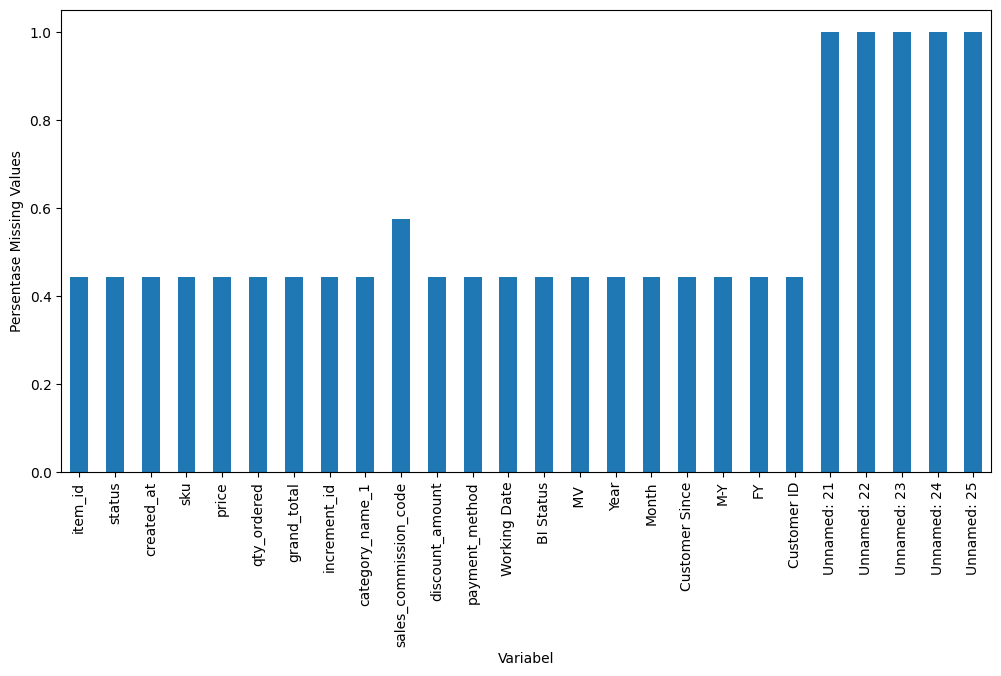

In [48]:
# Visualisasi persentase dari Missing Values
df.isna().mean().plot.bar(figsize=(12,6))
plt.ylabel('Persentase Missing Values')
plt.xlabel('Variabel')

Dari hasil analisis dataset, tiap-tiap kolom selain kolom *dummy* memiliki persentase data kosong dengan rentang 44,25% - 57,33%, dan pada kolom *Unnamed (Dummy)* sama sekali tidak memiliki data. Kemudian terdapat *typo* pada penamaan kolom dan berdasarkan hasil analisis terdapat format data yang kurang sesuai. Maka akan dilakukan beberapa penanganan data kosong sebagai berikut:
1. Penyesuaian *typo* pada kolom `MV` yang masih mengandung spasi dan penyederhanaan nama kolom `category_name_1` menjadi `category` agar lebih singkat namun tidak merubah makna dari nama kolom tersebut
2. Cek Duplikasi Data
3. Penghapusan kolom *Dummy* yang seluruh datanya kosong
3. Penghapusan baris dimana data mulai kosong hingga data terakhir
4. Pengisian data kosong yang memungkinkan untuk diisi

In [50]:
#1.1 Penyesuaian Typo

df.rename(columns={' MV ':'MV'}, inplace = True)
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [51]:
#1.2 Penyederhanaan nama kolom menjadi 'category'

df.rename(columns={'category_name_1':'category'}, inplace = True)
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category', 'sales_commission_code',
       'discount_amount', 'payment_method', 'Working Date', 'BI Status', 'MV',
       'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [52]:
#2. Cek Jumlah Duplikasi Data

df.duplicated().value_counts()

False    584525
True     464050
dtype: int64

In [53]:
#3. Penghapusan kolom *Dummy*

df = df.drop(df.columns[[-1,-2,-3,-4,-5]], axis = 1)
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#4.1 Menghapus baris dimana data pada seluruh kolom di baris tersebut mulai kosong
#Cek baris kosong mulai dari baris ke berapa dengan asumsi perhitungan total baris - jumlah baris kosong

print(f"Jumlah baris kosong dimulai pada baris {1048574 - 464051}")
copy_baris = df.iloc[584524:1048574].copy()
copy_baris

Jumlah baris kosong dimulai pada baris 584523


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#4.2 Menghapus baris dimana data pada seluruh kolom di baris tersebut mulai kosong
# Hapus baris kosong

hapus_baris = df.drop(range(584524, 1048575), axis = 0, inplace = True)
hapus_baris

In [56]:
# Cek kembali persentase missing value pada tiap kolom

df.isna().sum()/df.shape[0]*100

item_id                  0.000000 
status                   0.002566 
created_at               0.000000 
sku                      0.003422 
price                    0.000000 
qty_ordered              0.000000 
grand_total              0.000000 
increment_id             0.000000 
category                 0.028057 
sales_commission_code    23.467813
discount_amount          0.000000 
payment_method           0.000000 
Working Date             0.000000 
BI Status                0.000000 
MV                       0.000000 
Year                     0.000000 
Month                    0.000000 
Customer Since           0.001882 
M-Y                      0.000000 
FY                       0.000000 
Customer ID              0.001882 
dtype: float64

Setelah dilakukan penghapusan terhadap *missing value* pada kolom dummy dan baris yang tiap kolom nya tidak memiliki data, maka diperoleh hasil analisa sebagai berikut:

*   Pada kolom `sales_commision_code` memiliki persentase missing value yang relatif tinggi sebesar 23,46%. Dan kolom tersebut sebetulnya tidak memiliki relevansi dengan kolom-kolom yang lain, hanya sebagai data untuk menampung kode komisi sales. Maka untuk penyiapan datanya, kita dapat menghapus kolom tersebut.
*   Kemudian kolom lain yang memiliki missing value, adalah kolom `status`, `sku`, `category`, `Customer Since`, dan `Customer ID` dengan persentase *missing value* terendah adalah 0,0018%  dan tertinggi adalah 0,028%.
*   Tindakan yang akan dilakukan dari *missing value* yang tersisa adalah dengan menghapus seluruh sisa dari *missing value* tersebut dikarenakan persentase *missing values* bahkan tidak mencapai 1%.

In [57]:
#Mengisi value kosong pada kolom commission_code dengan no_code untuk memperoleh kemungkinan adanya korelasi dengan barang yang terjual

df['sales_commission_code'] = df['sales_commission_code'].fillna('No Code')

Setelah mengisi *Missing Value* pada kolom sales_commission_code, masih terdapat beberapa kolom yang kosong dengan persentase yang sebetulnya tidak terlalu besar. Untuk menangani hal tersebut, kita akan menggunakan metode pengisian dengan 'ffill' yang akan mengambil data sebelumnya untuk diisikan pada bagian data yang kosong. Namun demikian kita memerlukan sebuah kategori yang akan menampung 'ffill' tersebut.

In [58]:
#pertama pengisian pada kolom status

df['category'] = df['category'].fillna('ffill')

In [59]:
#kedua pengisin pada kolom sku

df.groupby(['category','status']).status.count().unstack()

status,\N,canceled,closed,cod,complete,exchange,fraud,holded,order_refunded,paid,payment_review,pending,pending_paypal,processing,received,refund
category,,,,,,,,,,,,,,,,
Appliances,NaN,21628.0,92.0,109.0,20709.0,NaN,NaN,3.0,4665.0,43.0,6.0,6.0,NaN,1.0,4587.0,564.0
Beauty & Grooming,NaN,9686.0,57.0,329.0,20734.0,NaN,NaN,3.0,3612.0,114.0,2.0,NaN,NaN,1.0,6257.0,700.0
Books,NaN,273.0,7.0,81.0,910.0,NaN,NaN,NaN,223.0,13.0,NaN,NaN,NaN,NaN,336.0,27.0
Computing,NaN,6811.0,16.0,66.0,5735.0,1.0,1.0,2.0,1631.0,18.0,NaN,2.0,NaN,NaN,1422.0,228.0
Entertainment,NaN,12579.0,7.0,21.0,9327.0,NaN,2.0,2.0,2090.0,20.0,1.0,11.0,NaN,NaN,2119.0,146.0
Health & Sports,NaN,3382.0,15.0,76.0,8049.0,NaN,NaN,NaN,2227.0,18.0,4.0,NaN,1.0,1.0,3499.0,230.0
Home & Living,NaN,7199.0,15.0,394.0,11153.0,NaN,1.0,2.0,2499.0,78.0,NaN,1.0,1.0,1.0,4601.0,559.0
Kids & Baby,NaN,4081.0,5.0,147.0,7025.0,NaN,NaN,NaN,1827.0,63.0,NaN,NaN,NaN,NaN,2978.0,363.0
Men's Fashion,NaN,22024.0,65.0,600.0,40291.0,1.0,NaN,5.0,14800.0,105.0,6.0,NaN,3.0,20.0,12191.0,2109.0


In [60]:
# Isi data NaN pada kolom status dengan penerapan limit
df['status'].fillna('complete',limit = 10,inplace =True)

In [61]:
# Isi data NaN pada kolom status dengan penerapan limit
df['status'].fillna('canceled',limit = 5,inplace =True)

In [62]:
# Isi data NaN pada kolom sku
df['sku'].fillna(method = 'ffill', inplace = True)

In [63]:
# Isi data NaN pada kolom Customer Since
df['Customer Since'].fillna(method = 'ffill', inplace = True)

In [64]:
# Setelah dilakukan penelaahan pada kolom Customer ID, ternyata customer ID tersebut dibuat secara otomatis dengan berurutan, namun terdapat beberapa customer ID yang melalukan pemesanan 
# kembali dengan ID yang sama pada periode yang berbeda. Tentu hal ini tidak memungkinkan untuk diisi dengan 'ffill' maka dilakukan penanganan dengan metode hapus

df.dropna(axis=0,inplace=True)

In [65]:
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category                 0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
MV                       0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

Setelah data dibersihkan, berikut merupakan informasi data yang siap digunakan

In [66]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(584513, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,item_id,float64,0,584513,"[843239.0, 509068.0]"
1,status,object,0,16,"[holded, complete]"
2,created_at,object,0,789,"[3/24/2018, 12/16/2016]"
3,sku,object,0,84888,"[Mobo_ar24, LS_9410010937691]"
4,price,float64,0,9121,"[1657.0, 2764.0]"
5,qty_ordered,float64,0,74,"[72.0, 29.0]"
6,grand_total,float64,0,36829,"[941.25, 34216.0]"
7,increment_id,object,0,408776,"[100269543, 100240882]"
8,category,object,0,17,"[Computing, Men's Fashion]"
9,sales_commission_code,object,0,7227,"[birthday bash, C HDD20073]"


Ternyata masih terdapat data #REF!, maka kita ganti dulu datanya menjadi data yang sesuai dengan isian data pada kolom `BI Status`

In [67]:
df['BI Status'] = df['BI Status'].replace(['#REF!'], 'Net')

In [68]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,Net,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


# Data Analysis

Tahapan data cleaning telah dilakukan untuk mendapatkan dataset yang bisa diolah. Selanjutnya untuk mengetahui beberapa hal yang menjadi pertanyaan, kita akan melakukan analisis terhadap Pakistan Largest e-Commerce Dataset.

Tahapan pertama adalah dengan mencari tahu kategori barang yang paling banyak terjual sepanjang Tahun 2016 hingga 2018

Insight

1. Kategori barang dengan penjualan terbanyak => Mencari tahu kategori barang yang paling banyak terjual
2. Order status terbanyak => Mencari tahu status pemesanan yang paling banyak terjadi
3. Metode pembayaran yang paling banyak digunakan => Mencari tahu metode pambayaran yang paling banyak dilakukan
4. Hubungan antara kategori barang dengan discount => Mencari tahu apakah diskon yang diberikan mempengaruhi banyaknya penjualan (rekomendasi optional)
5. Hubungan antara metode pembayaran dan status pemesanan => Mencari tahu apakah metode pembayaran yang dilakukan berpengaruh terhadap status pemesanan
6. Hubungan antara waktu pemesanan dan kategori barang => Mencari tahu apakah terdapat hubungan yang berarti antara waktu pemesanan terhadap kategori barang yang dijual


In [87]:
# Analisis top sales berdasarkan hasil penjualan terbanyak

top_Category = df.groupby('category')['item_id'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False)
top_Category

,category,count
9,Mobiles & Tablets,115710
8,Men's Fashion,92219
14,Women's Fashion,59720
0,Appliances,52413
13,Superstore,43613
1,Beauty & Grooming,41494
12,Soghaat,34011
10,Others,29212
6,Home & Living,26504
4,Entertainment,26326


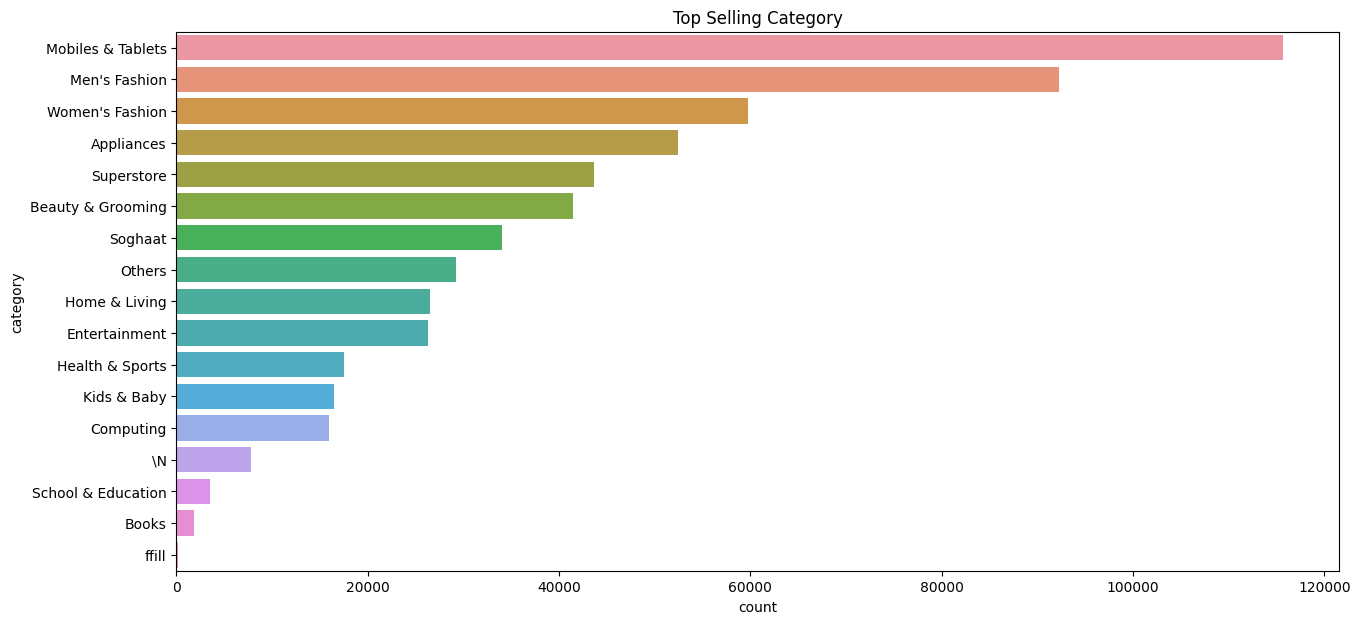

In [88]:
# Visualisasi top 10 category

plt.figure(figsize = (15,7))
graph = sns.barplot(y = 'category', x = 'count', data = top_Category)
graph.set_title('Top Selling Category')
plt.show()

In [73]:
# Analisa order status terkait dengan status pesanan yang dilakukan, status pesanan apakah yang paling banyak terjadi sepanjang Tahun 2016 - 2018

order_stat = df.groupby('status')['item_id'].agg(['count']).reset_index().sort_values(by='count', ascending = False)
order_stat

,status,count
4,complete,233695
1,canceled,201249
14,received,77289
8,order_refunded,59524
15,refund,8050
3,cod,2859
9,paid,1159
2,closed,494
10,payment_review,57
11,pending,48


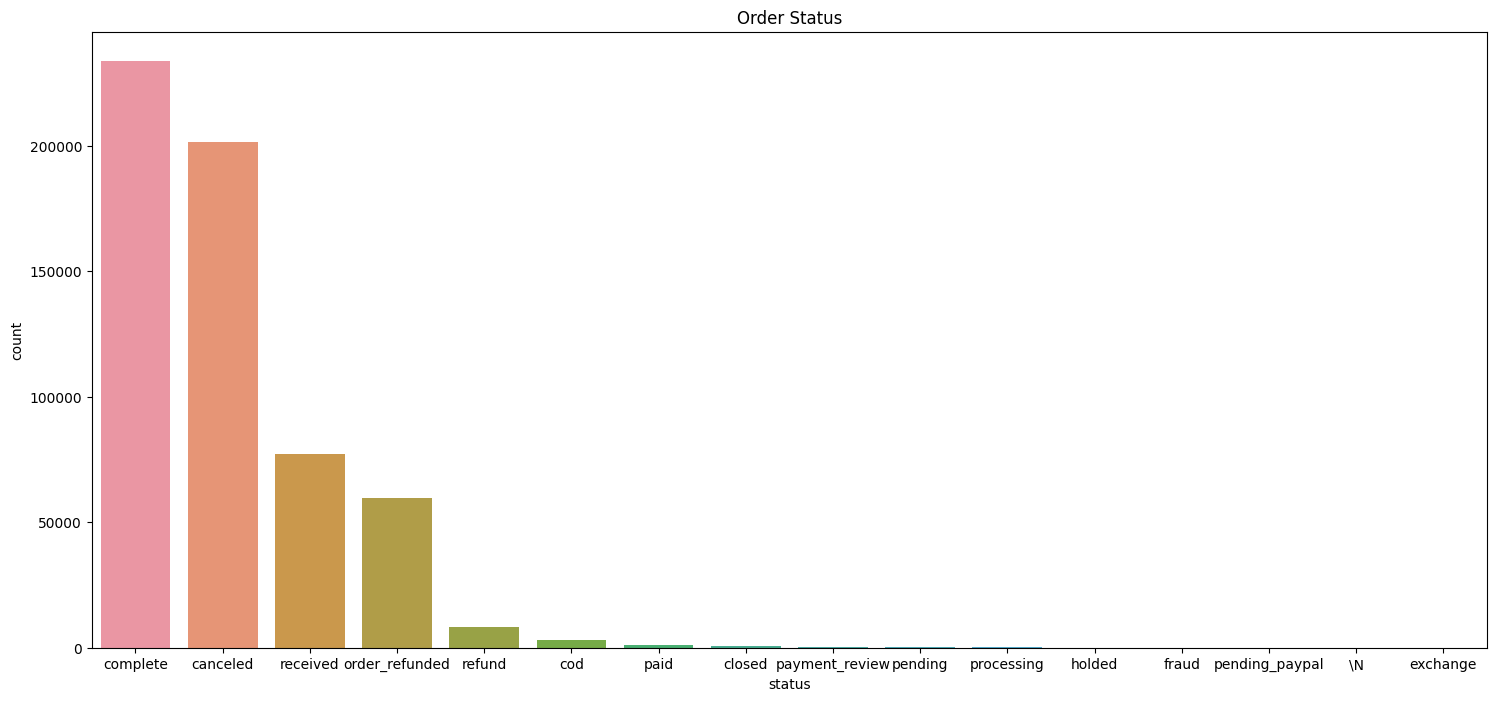

In [80]:
# Visualisasi order status

plt.figure(figsize = (18,8))
graph2 = sns.barplot(x = 'status', y = 'count', data = order_stat)
graph2.set_title('Order Status')
plt.show()

In [82]:
df['payment_method'].nunique()

18